# TP1 -- ROB317

J'ai utilisé google colab et il faut initialiser son environnement.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import sys

# Modifier la variable du TD en fonction de l'endroit où les données sont stockées
TD_DIR = 'gdrive/My Drive/ROB317/TP1/'
sys.path.append(TD_DIR)

Mounted at /content/gdrive


# Format d’images et Convolutions


Q1: Je ne vois pas trop de différence entre les deux images mais le fitre2D est plus rapid dans le calcul.





Dimension de l'image : 240 lignes x 360 colonnes
Méthode directe : 0.2555913 s
Méthode filter2D : 0.000679523 s


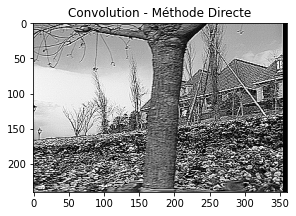

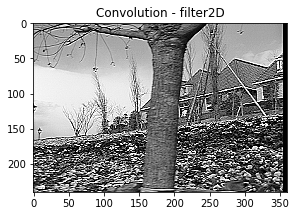

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/FlowerGarden2.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Méthode Directe')

#Méthode filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")
plt.figure(figsize=(10,8))
plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')

plt.show()


Q2: Le bord de l'image souvent a plus de constraste que les autres parties. Le noyau de convolution ne focalise que le pixel mais aussi les pixels voisins de ce pixel. Le résultat de convolution rehausse la différence entre ce pixel et ses voisins donc un réhaussement de contraste est realisé.

Q3: J'ai implementé le filtre de gradient X, Y et le filtre de la norme euclidienne du gradient pour les deux méthodes donc j'ai affiché 6 images. Les résultats de filter2D sont plus sombre que les résultats de méthode directe. Tous les six images affichent les textures claires de image. 

Dimension de l'image : 240 lignes x 360 colonnes
Méthode directe de gradient X: 0.135238449 s
Méthode directe de gradient Y: 0.140884771 s
Méthode directe de gradient X+Y: 0.427869828 s
Méthode filter2D X: 0.002892683 s
Méthode filter2D Y: 0.00285635 s
Méthode filter2D $\sqrt{I_x^2+I_y^2}$ : 0.00468738 s


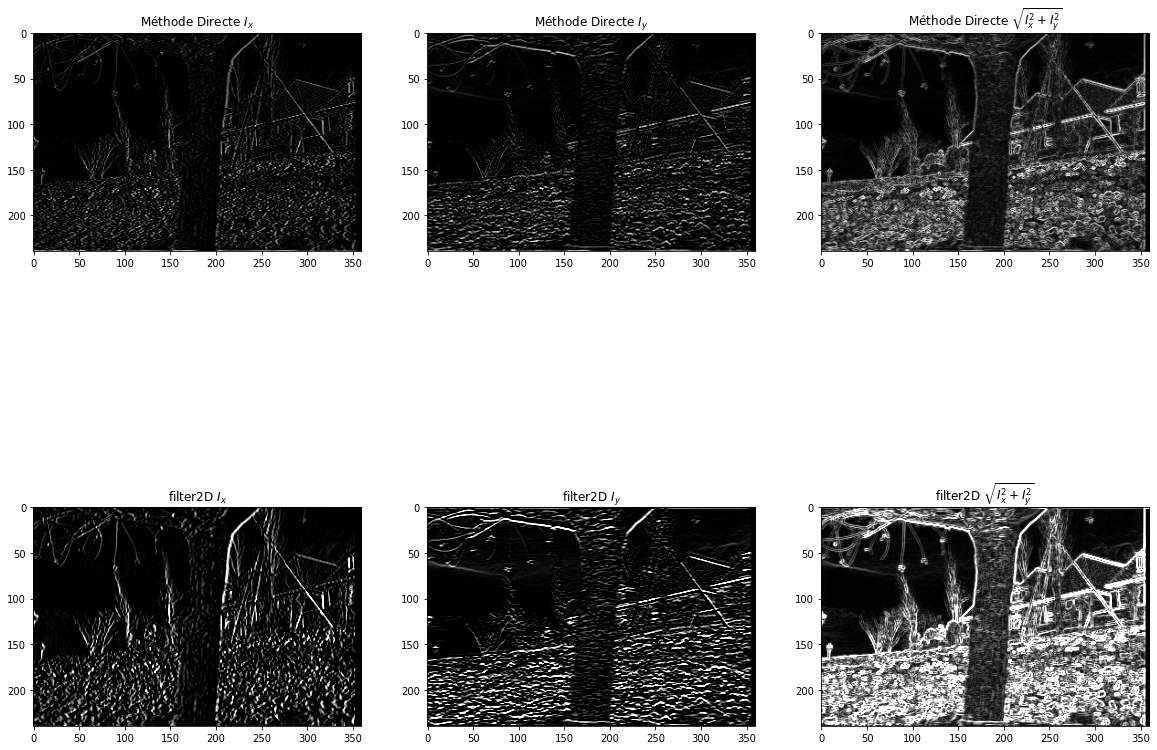

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

plt.figure(figsize=(20,16))

#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/FlowerGarden2.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

#Méthode directe de gradient X
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    #val = 2*(img[y, x+1] - img[y, x-1]) + img[y-1, x+1] - img[y-1, x-1] +img[y+1, x+1] - img[y+1, x-1]
    val = (img[y, x+1] - img[y, x-1])
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe de gradient X:",time,"s")

plt.subplot(231)
plt.imshow(img2,cmap = 'gray')
plt.title('Méthode Directe $I_x$')

#Méthode directe de gradient Y
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    #val = 2*(img[y+1, x] - img[y-1, x]) + img[y+1, x+1] - img[y-1, x+1] +img[y+1, x-1] - img[y-1, x-1]
    val = (img[y+1, x] - img[y-1, x]) 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe de gradient Y:",time,"s")

plt.subplot(232)
plt.imshow(img2,cmap = 'gray')
plt.title('Méthode Directe $I_y$')

#Méthode directe de gradient
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    #val = 0.5*(img[y+1, x+1] + img[y+1, x] +img[y, x+1] - img[y, x-1] - img[y-1, x-1] - img[y-1, x])
    val = np.sqrt((img[y+1, x] - img[y-1, x])**2 + (img[y, x+1] - img[y, x-1])**2)
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe de gradient X+Y:",time,"s")

plt.subplot(233)
plt.imshow(img2,cmap = 'gray')
plt.title('Méthode Directe $\sqrt{I_x^2+I_y^2}$')

#Méthode filter2D de gradient X
t1 = cv2.getTickCount()
kernel = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Ix = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D X:",time,"s")

plt.subplot(234)
plt.imshow(Ix,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('filter2D $I_x$')

#Méthode filter2D de gradient Y
t1 = cv2.getTickCount()
kernel = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
Iy = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D Y:",time,"s")

plt.subplot(235)
plt.imshow(Iy,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('filter2D $I_y$')

#Méthode filter2D de gradient 
t1 = cv2.getTickCount()
delta = np.sqrt(Ix*Ix+Iy*Iy)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D $\sqrt{I_x^2+I_y^2}$ :",time,"s")

plt.subplot(236)
plt.imshow(delta,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('filter2D $\sqrt{I_x^2+I_y^2}$')

plt.show()

# Détecteurs

Q4: J'ai fait le filtre de sobel pour avoir les gradients du x et y .
Ensuite, j'ai fait la convolution gaussienne pour calculer la matrice de 
correlation [[A,B],[B,C]]. Supposant k = 0.04, la fonction d'intêret de
Harris est AC-BB-k*(A+C)(A+C).

Dimension de l'image : 320 lignes x 400 colonnes
Type de l'image : float64
Mon calcul des points de Harris : 1.135580121 s
Nombre de cycles par pixel : 8871.7196953125 cpp
Dimension de l'image : 320 lignes x 400 colonnes x 3 canaux
Type de l'image : uint8


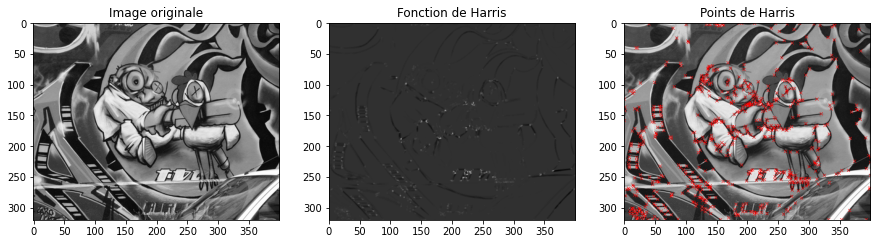

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
plt.figure(figsize=(15,30))
#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/Graffiti0.png',cv2.IMREAD_GRAYSCALE))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")
print("Type de l'image :",img.dtype)

#Début du calcul
t1 = cv2.getTickCount()
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
# Mettre ici le calcul de la fonction d'intérêt de Harris
#Theta = cv2.cornerHarris(img,2,3,0.04)
Dx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
Dy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

cov = np.zeros([img.shape[0], img.shape[1], 3], dtype=np.float32)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    cov[i,j,0] = Dx[i,j] * Dx[i,j]
    cov[i,j,1] = Dx[i,j] * Dy[i,j]
    cov[i,j,2] = Dy[i,j] * Dy[i,j]
cov = cv2.boxFilter(cov, -1, (3, 3), normalize = False)
for i in range(cov.shape[0]):
  for j in range(cov.shape[1]):
    a = cov[i,j,0]
    b = cov[i,j,1]
    c = cov[i,j,2]
    Theta[i,j] = a*c - b*b - 0.04*(a+c)*(a+c)
# Calcul des maxima locaux et seuillage
Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)
#Suppression des non-maxima-locaux
Theta_maxloc[Theta < Theta_dil] = 0.0
#On néglige également les valeurs trop faibles
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Mon calcul des points de Harris :",time,"s")
print("Nombre de cycles par pixel :",(t2 - t1)/(h*w),"cpp")

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Image originale')

plt.subplot(132)
plt.imshow(Theta,cmap = 'gray')
plt.title('Fonction de Harris')

se_croix = np.uint8([[1, 0, 0, 0, 1],
[0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
[0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Relecture image pour affichage couleur
Img_pts=cv2.imread(TD_DIR+'/Image_Pairs/Graffiti0.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")
print("Type de l'image :",Img_pts.dtype)
#On affiche les points (croix) en rouge
Img_pts[Theta_ml_dil > 0] = [255,0,0]
plt.subplot(133)
plt.imshow(Img_pts)
plt.title('Points de Harris')

plt.show()


Q5:le fonction de Harris choisis les points avec le plus changement de
couleur. J'ai étudié trois paramètres: le size de matrice de convolution,  et le paramètre de Harris(k). Avec l'augmentation de size de matrice, les points d'intêret sont plus sombres.
Dans l'idéal, l'augmentation de paramètre de Harris diminue le nombre de point d'intêret mais ce n'est claire dans mes resultats. Le filtre gausienne est d'éliminier le bruit donc l'écart-type gaussienne n'influence pas les resultats.


Dimension de l'image : 320 lignes x 400 colonnes
Type de l'image : float64
size de filtre: 3*3


Text(0.5, 1.0, 'sigma=10,k=0.06')

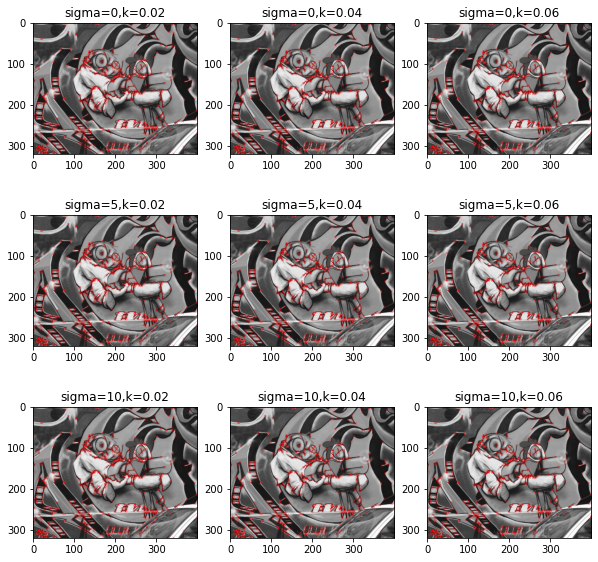

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread(TD_DIR+'/Image_Pairs/Graffiti0.png',cv2.IMREAD_GRAYSCALE))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")
print("Type de l'image :",img.dtype)

#Début du calcul
sigma = 0
k = 0.04
result = []
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
[Dx,Dy] = np.gradient(img)
cov = np.zeros([img.shape[0], img.shape[1], 3], dtype=np.float32)
d_maxloc = 3
seuil_relatif = 0.01
for size in [3,15,31]:
  for sigma in [0, 5, 10]:## on n'a pas utlise ca
    for k in [0.02,0.04,0.06]:
      for i in range(img.shape[0]):
        for j in range(img.shape[1]):
          cov[i,j,0] = Dx[i,j] * Dx[i,j]
          cov[i,j,1] = Dx[i,j] * Dy[i,j]
          cov[i,j,2] = Dy[i,j] * Dy[i,j]
      cov = cv2.boxFilter(cov, -1, (size, size), normalize = False)
      for i in range(cov.shape[0]):
        for j in range(cov.shape[1]):
          a = cov[i,j,0]
          b = cov[i,j,1]
          c = cov[i,j,2]
          Theta[i,j] = a*c - b*b - k*(a+c)*(a+c)
      
      Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
      se = np.ones((d_maxloc,d_maxloc),np.uint8)
      Theta_dil = cv2.dilate(Theta,se)
      Theta_maxloc[Theta < Theta_dil] = 0.0
      Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
      se_croix = np.uint8([[1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0],[0, 0, 1, 0, 0],
      [0, 1, 0, 1, 0],[1, 0, 0, 0, 1]])
      Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
      Img_pts=cv2.imread(TD_DIR+'/Image_Pairs/Graffiti0.png',cv2.IMREAD_COLOR)
      Img_pts[Theta_ml_dil > 0] = [255,0,0]
      result.append(Img_pts)
print("size de filtre: 3*3")
plt.subplot(331)
plt.imshow(result[0])
plt.title('sigma=0,k=0.02')

plt.subplot(332)
plt.imshow(result[1])
plt.title('sigma=0,k=0.04')

plt.subplot(333)
plt.imshow(result[2])
plt.title('sigma=0,k=0.06')

plt.subplot(334)
plt.imshow(result[3])
plt.title('sigma=5,k=0.02')

plt.subplot(335)
plt.imshow(result[4])
plt.title('sigma=5,k=0.04')

plt.subplot(336)
plt.imshow(result[5])
plt.title('sigma=5,k=0.06')

plt.subplot(337)
plt.imshow(result[6])
plt.title('sigma=10,k=0.02')

plt.subplot(338)
plt.imshow(result[7])
plt.title('sigma=10,k=0.04')

plt.subplot(339)
plt.imshow(result[8])
plt.title('sigma=10,k=0.06')

size de filtre: 15*15


Text(0.5, 1.0, 'sigma=10,k=0.06')

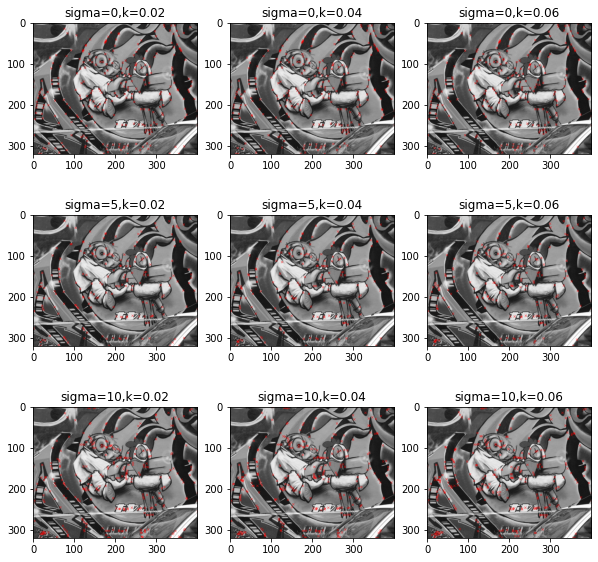

In [ ]:
plt.figure(figsize=(10,10))
print("size de filtre: 15*15")
plt.subplot(331)
plt.imshow(result[9])
plt.title('sigma=0,k=0.02')

plt.subplot(332)
plt.imshow(result[10])
plt.title('sigma=0,k=0.04')

plt.subplot(333)
plt.imshow(result[11])
plt.title('sigma=0,k=0.06')

plt.subplot(334)
plt.imshow(result[12])
plt.title('sigma=5,k=0.02')

plt.subplot(335)
plt.imshow(result[13])
plt.title('sigma=5,k=0.04')

plt.subplot(336)
plt.imshow(result[14])
plt.title('sigma=5,k=0.06')

plt.subplot(337)
plt.imshow(result[15])
plt.title('sigma=10,k=0.02')

plt.subplot(338)
plt.imshow(result[16])
plt.title('sigma=10,k=0.04')

plt.subplot(339)
plt.imshow(result[17])
plt.title('sigma=10,k=0.06')

size de filtre: 31*31


Text(0.5, 1.0, 'sigma=10,k=0.06')

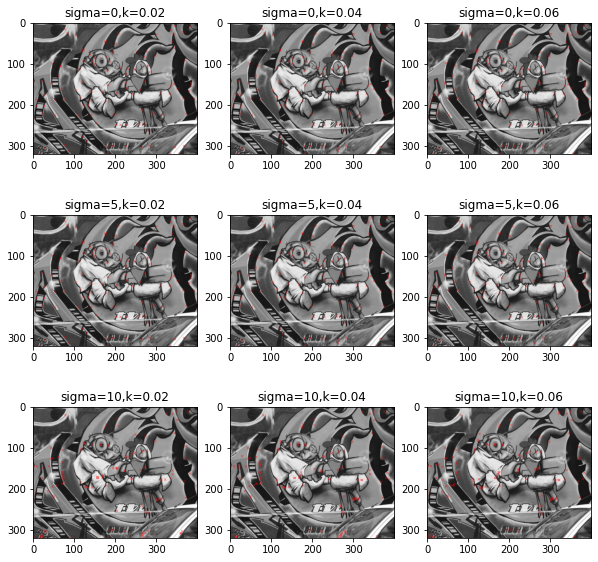

In [ ]:
plt.figure(figsize=(10,10))
print("size de filtre: 31*31")
plt.subplot(331)
plt.imshow(result[18])
plt.title('sigma=0,k=0.02')

plt.subplot(332)
plt.imshow(result[19])
plt.title('sigma=0,k=0.04')

plt.subplot(333)
plt.imshow(result[20])
plt.title('sigma=0,k=0.06')

plt.subplot(334)
plt.imshow(result[21])
plt.title('sigma=5,k=0.02')

plt.subplot(335)
plt.imshow(result[22])
plt.title('sigma=5,k=0.04')

plt.subplot(336)
plt.imshow(result[23])
plt.title('sigma=5,k=0.06')

plt.subplot(337)
plt.imshow(result[24])
plt.title('sigma=10,k=0.02')

plt.subplot(338)
plt.imshow(result[25])
plt.title('sigma=10,k=0.04')

plt.subplot(339)
plt.imshow(result[26])
plt.title('sigma=10,k=0.06')

Q6: Je n'ai pas réussi de faire choix avec le système donc je sépare 
les deux déteteurs. Le premier résultat est pour le déteteur Orb et le 
deuxième est pour le detéteur Kaze. Le dététeur ORB trouve la plage
 la plus longue avec les points continus et génére un vecteur entre le centre de gravité o et le point FAST p. Il y a trois paramètres dans l'exemple: nfeatures, scaleFactor et nlevels. Le nfeatures est le nombre de feature d'éxtraction. Il influence le nombre de cercle qui représent la feature. Le scale factor et le nlevels sont concernant la pyramide gaussienne. Le scale factor et le nlevels sont plus grands, on peut extraire plus des features.

Usage : /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py detector(= orb ou kaze)
Usage : /usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py detector(= orb ou kaze)
Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection des points d'intérêt : 0.189917846 s


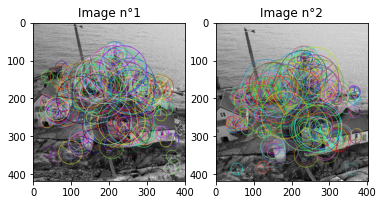

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

import sys

if len(sys.argv) != 2:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  #sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  #sys.exit(2)

#Lecture de la paire d'images
img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
'''
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 250,#Par défaut : 500
                       scaleFactor = 2,#Par défaut : 1.2
                       nlevels = 3)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=250,
                        scaleFactor = 2,
                        nlevels = 3)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
'''
kp1 = cv2.ORB_create(nfeatures = 250,#Par défaut : 500
                       scaleFactor = 2,#Par défaut : 1.2
                       nlevels = 3)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=250,
                        scaleFactor = 2,
                        nlevels = 3)
print("Détecteur : ORB")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection des keypoints
pts1 = kp1.detect(gray1,None)
pts2 = kp2.detect(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection des points d'intérêt :",time,"s")

#Affichage des keypoints
img1 = cv2.drawKeypoints(gray1, pts1, None, flags=4)
# flags définit le niveau d'information sur les points d'intérêt
# 0 : position seule ; 4 : position + échelle + direction
img2 = cv2.drawKeypoints(gray2, pts2, None, flags=4)

plt.subplot(121)
plt.imshow(img1)
plt.title('Image n°1')

plt.subplot(122)
plt.imshow(img2)
plt.title('Image n°2')

plt.show()

Le dététeur KAZE trouve les features dans l'éspace avec la scale non-linéaire. D'abord, il construit l'éspace non-linéaire avec les fonctions gaussiennes. Ensuite, il recherche les features par les points maximal locaux du Hessien. Dans le code, il y a cinq parametres: upright, threshold, nOctaves, nOctaveLayers et diffusivity. L'upright est la direcetion de diffusivité. Le threshold est la changement minimale pour calculer la diffusivité. La diffusivité s'agit la nombre de diffusivité. Le nOctaves s'aigt le nombre de l'octaves et le nOctaveLayers est le nombre de layers pour chaque octaves.
 

Détecteur : KAZE
Détection des points d'intérêt : 0.559675796 s


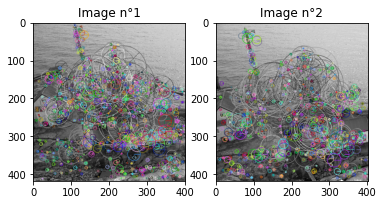

In [ ]:
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		    threshold = 0.001,#Par défaut : 0.001
  		      nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	      threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection des keypoints
pts1 = kp1.detect(gray1,None)
pts2 = kp2.detect(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection des points d'intérêt :",time,"s")

#Affichage des keypoints
img1 = cv2.drawKeypoints(gray1, pts1, None, flags=4)
# flags définit le niveau d'information sur les points d'intérêt
# 0 : position seule ; 4 : position + échelle + direction
img2 = cv2.drawKeypoints(gray2, pts2, None, flags=4)

plt.subplot(121)
plt.imshow(img1)
plt.title('Image n°1')

plt.subplot(122)
plt.imshow(img2)
plt.title('Image n°2')

plt.show()

# Descripteurs et Appariement

Q7: Le descripteur de ORB est l'algorithme BRIEF. Sa principale est de décoder les features après la filtrage gaussienne. Il choisit N pair de point ramdom et valorise le petit avec 1 et le grand avec 0. La principale de descripteur de KAZE est de générer un éspace de point d'intêret et de faire décodage avec le kernel gaussien. 

Le dététeur de ORB génére un vecteur entre le centre de gravité o et le point FAST p qui permet de rendre l’appariement invariant par rotation car après la rotation le vecteur va connecter la même paire. Le dététeur de KAZE crée un éspace non-linéaire pour détécter les features. Il y a plusieurs échelles dans cet éspace, donc il est capable de rentre l’appariement invariant par changement d'échelles.

Q8: dans le code feature_match_crosscheck.py, le descripteur de ORB prend moins de temps dans les détéctions et les calculs mais le descripteur de KAZE trouve beaucoup plus des points d'intêret. Donc le descripteur de ORB est plus rapide et le descripteur de KAZE est plus precise. 

Les distances de descripteurs sont différents car leur algorithmne de détéction sont différents. Dans l'ORB, il dététe la plage plus longue de point sombre ou lumière et sa distance est Hanming distance. Dans KAZE, il détécte ces points dans l'éspace non-linéaire et sa distance est distance euclidienne. FLANN ne fonctionne bien dans les points de l'ORB car il ne considérer pas l'orientation des features et il calcule la distance euclidienne.

resultat de ORB dans Features Match CrossCheck.py

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection points et calcul descripteurs : 0.021220875 s
Calcul de l'appariement : 0.008790237 s


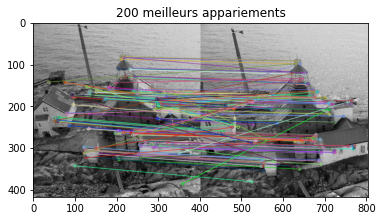

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

'''
import sys
if len(sys.argv) != 2:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
'''
#Lecture de la paire d'images
img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)
'''
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
'''

t1 = cv2.getTickCount()
kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                    scaleFactor = 1.2,#Par défaut : 1.2
                    nlevels = 8)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=500,
                    scaleFactor = 1.2,
                    nlevels = 8)
print("Détecteur : ORB")

#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
#Les points non appariés apparaîtront en gris 
img1 = cv2.drawKeypoints(gray1, pts1, None, color=(127,127,127), flags=0)
img2 = cv2.drawKeypoints(gray2, pts2, None, color=(127,127,127), flags=0)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
#if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
#else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  #bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1,desc2)
# Tri des appariemements 
matches = sorted(matches, key = lambda x:x.distance)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Trace les N meilleurs appariements
Nbest = 200
img3 = cv2.drawMatches(img1,pts1,img2,pts2,matches[:Nbest],None,flags=2)
plt.imshow(img3),plt.title('%i meilleurs appariements'%Nbest)
plt.show()

resultat de KAZE dans tous les trois codes

Détecteur : KAZE
Détection points et calcul descripteurs : 0.681906539 s
Calcul de l'appariement : 0.01819969 s


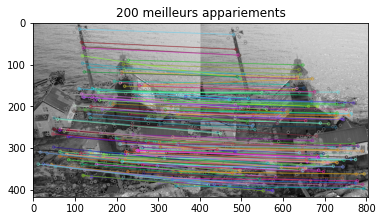

In [ ]:
t1 = cv2.getTickCount()
kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
#Les points non appariés apparaîtront en gris 
img1 = cv2.drawKeypoints(gray1, pts1, None, color=(127,127,127), flags=0)
img2 = cv2.drawKeypoints(gray2, pts2, None, color=(127,127,127), flags=0)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
#if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  #bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
#else:
  #Distance L2 pour descripteur M-SURF (KAZE)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1,desc2)
# Tri des appariemements 
matches = sorted(matches, key = lambda x:x.distance)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Trace les N meilleurs appariements
Nbest = 200
img3 = cv2.drawMatches(img1,pts1,img2,pts2,matches[:Nbest],None,flags=2)
plt.imshow(img3),plt.title('%i meilleurs appariements'%Nbest)
plt.show()

resultat de ORB dans Features Match RatioTest.py

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection points et calcul descripteurs : 0.021903702 s
Calcul de l'appariement : 0.005348273 s


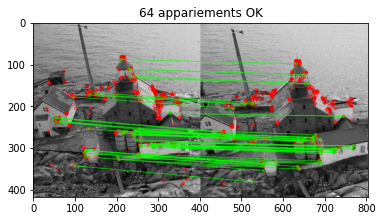

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
'''
import sys
if len(sys.argv) != 2:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze) match_method (= bf ou flann)")
  sys.exit(2)
'''
#Lecture de la paire d'images
img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)
'''
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
'''

t1 = cv2.getTickCount()
kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                    scaleFactor = 1.2,#Par défaut : 1.2
                    nlevels = 8)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=500,
                    scaleFactor = 1.2,
                    nlevels = 8)
print("Détecteur : ORB")

#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
#if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
#else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  #bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Extraction de la liste des 2-plus-proches-voisins
matches = bf.knnMatch(desc1,desc2, k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

resultat de KAZE dans Features Match RatioTest.py

Détecteur : KAZE
Détection points et calcul descripteurs : 0.654355337 s
Calcul de l'appariement : 0.01291067 s


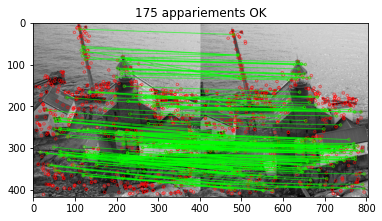

In [ ]:
t1 = cv2.getTickCount()
kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
print("Détecteur : KAZE")

#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
#if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  #bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
#else:
  #Distance L2 pour descripteur M-SURF (KAZE)
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Extraction de la liste des 2-plus-proches-voisins
matches = bf.knnMatch(desc1,desc2, k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

resultat de ORB dans Features Match FLANN.py

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection points et calcul descripteurs : 0.323676897 s
Calcul de l'appariement : 0.014421717 s


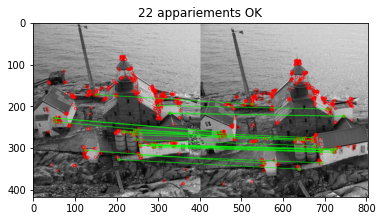

In [ ]:
import numpy as np
import cv2

from matplotlib import pyplot as plt
'''
import sys
if len(sys.argv) != 2:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
if sys.argv[1].lower() == "orb":
  detector = 1
elif sys.argv[1].lower() == "kaze":
  detector = 2
else:
  print ("Usage :",sys.argv[0],"detector(= orb ou kaze)")
  sys.exit(2)
'''
#Lecture de la paire d'images
img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
'''
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
'''
kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                    scaleFactor = 1.2,#Par défaut : 1.2
                    nlevels = 8)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=500,
                    scaleFactor = 1.2,
                    nlevels = 8)
print("Détecteur : ORB")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
# Paramètres de FLANN 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
desc1 = np.float32(desc1)
flann = cv2.FlannBasedMatcher(index_params,search_params)
desc2 = np.float32(desc2)  
matches = flann.knnMatch(desc1,desc2,k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)

# Affichage des appariements qui respectent le ratio test
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

resultat de KAZE dans Features Match FLANN.py

Détecteur : KAZE
Détection points et calcul descripteurs : 0.696253004 s
Calcul de l'appariement : 0.032906734 s


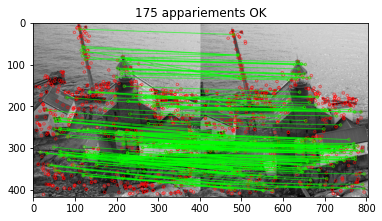

In [ ]:
t1 = cv2.getTickCount()
kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		    threshold = 0.001,#Par défaut : 0.001
  		      nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	      threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
# Paramètres de FLANN 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
desc1 = np.float32(desc1)
flann = cv2.FlannBasedMatcher(index_params,search_params)
desc2 = np.float32(desc2)  
matches = flann.knnMatch(desc1,desc2,k=2)
# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)

# Affichage des appariements qui respectent le ratio test
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()

Q9: J'ai fait l'extension et la rotation de l'image. Pour l'extension, avec l'augmentation de scale, le nombre des bonnes appariement diminue. Par contre, la rotation ne change pas beaucoup.

Détecteur : ORB
scale =  1.492537313432836
Calcul de l'appariement : 0.004526229 s


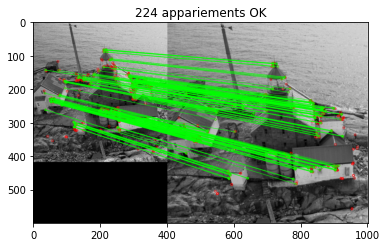

scale =  1.9900497512437811
Calcul de l'appariement : 0.004783749 s


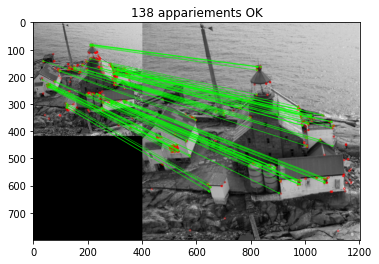

scale =  2.487562189054726
Calcul de l'appariement : 0.006654739 s


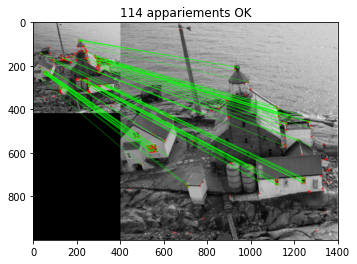

scale =  2.985074626865672
Calcul de l'appariement : 0.004727219 s


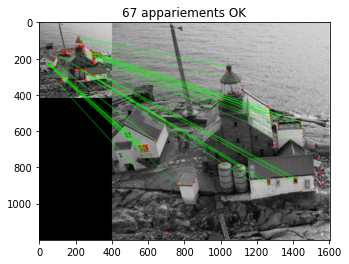

scale =  3.9800995024875623
Calcul de l'appariement : 0.005061048 s


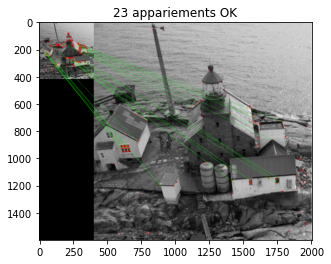

scale =  4.975124378109452
Calcul de l'appariement : 0.004501506 s


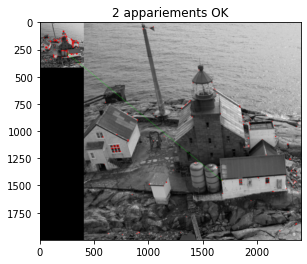

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

SIZE = [600,800,1000,1200,1600,2000]
result = []

kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                    scaleFactor = 1.2,#Par défaut : 1.2
                    nlevels = 8)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=500,
                    scaleFactor = 1.2,
                    nlevels = 8)
print("Détecteur : ORB")


for size in SIZE:
  img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
  a = size/img1.shape[1]
  b = 0
  M = np.array([[a,b,0], [-b,a,0]])
  print("scale = ",a)
  img2 = cv2.warpAffine(img1,M,(size,size),borderValue=(255,255,255)) 
  #Conversion en niveau de gris
  gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  #Détection et description des keypoints
  pts1, desc1 = kp1.detectAndCompute(gray1,None)
  pts2, desc2 = kp2.detectAndCompute(gray2,None)

  # Calcul de l'appariement
  t1 = cv2.getTickCount()

  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

  # Extraction de la liste des 2-plus-proches-voisins
  matches = bf.knnMatch(desc1,desc2, k=2)
  # Application du ratio test
  good = []
  for m,n in matches:
    if m.distance < 0.7*n.distance:
      good.append([m])
  t2 = cv2.getTickCount()
  time = (t2 - t1)/ cv2.getTickFrequency()
  print("Calcul de l'appariement :",time,"s")

  # Affichage des appariements qui respectent le ratio test
  draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    flags = 0)
  img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

  Nb_ok = len(good)
  plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
  plt.show()


Détecteur : ORB
angle =  15
Calcul de l'appariement : 0.004664321 s


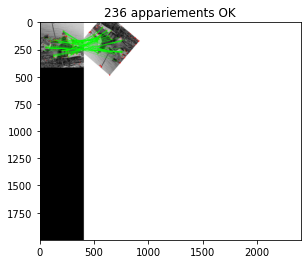

angle =  30
Calcul de l'appariement : 0.004551327 s


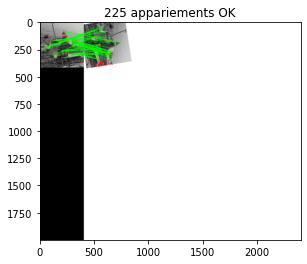

angle =  45
Calcul de l'appariement : 0.004640468 s


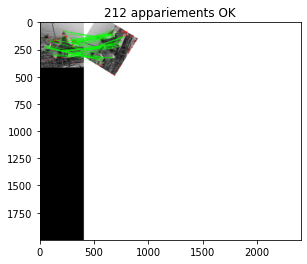

angle =  60
Calcul de l'appariement : 0.004789467 s


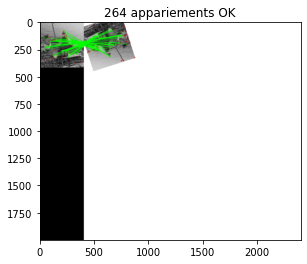

angle =  75
Calcul de l'appariement : 0.00520821 s


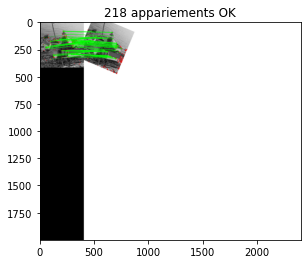

angle =  90
Calcul de l'appariement : 0.005687032 s


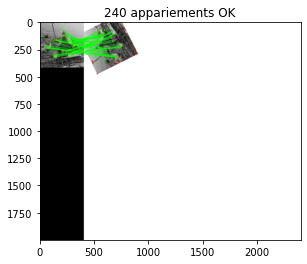

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
img2 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small2.png')

Angle = [15,30,45,60,75,90]
result = []

kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                    scaleFactor = 1.2,#Par défaut : 1.2
                    nlevels = 8)#Par défaut : 8
kp2 = cv2.ORB_create(nfeatures=500,
                    scaleFactor = 1.2,
                    nlevels = 8)
print("Détecteur : ORB")

original = img1.shape[1]
for angle in Angle:
  img1 = cv2.imread(TD_DIR+'/Image_Pairs/torb_small1.png')
  scale = 1
  a = np.cos(angle)*scale
  b = np.sin(angle)*scale
  centerX = img1.shape[0] / 2
  centerY = img1.shape[1] / 2
  M = np.array([[a,b,(1-a)*centerX-b*centerY], [-b,a,b*centerX+(1-a)*centerY]])#rotation center is (0,0)
  print("angle = ",angle)
  img2 = cv2.warpAffine(img1,M,(2000,2000),borderValue=(255,255,255)) 
  #Conversion en niveau de gris
  gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
  gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
  #Détection et description des keypoints
  pts1, desc1 = kp1.detectAndCompute(gray1,None)
  pts2, desc2 = kp2.detectAndCompute(gray2,None)

  # Calcul de l'appariement
  t1 = cv2.getTickCount()

  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

  # Extraction de la liste des 2-plus-proches-voisins
  matches = bf.knnMatch(desc1,desc2, k=2)
  # Application du ratio test
  good = []
  for m,n in matches:
    if m.distance < 0.7*n.distance:
      good.append([m])
  t2 = cv2.getTickCount()
  time = (t2 - t1)/ cv2.getTickFrequency()
  print("Calcul de l'appariement :",time,"s")

  # Affichage des appariements qui respectent le ratio test
  draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    flags = 0)
  img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

  Nb_ok = len(good)
  plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
  plt.show()
